## Ontogenetic Growth Models

Jupyter notebook providing derivations and simulations of the dominant growth models in the current OGM literature

\usepackage{ulem}

In [ ]:
# Imports
import scipy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.integrate as integrate                     # Numerical integration

West _et al._ 2001: A general model for ontogenetic growth

\begin{equation}
    \frac{dm}{dt} = am^{3/4} - bm
\end{equation}

Model is for determinate growth.
Growths terminates at size M when 
\begin{align}
\frac{dm}{dt} &= 0 \\
am^{3/4} - bm &= 0 \\
am^{3/4} &= bm \\
\frac{am^{3/4}}{b} &= m \\
M^{1/4} &= \frac{a}{b} \\
M &= \Big(\frac{a}{b}\Big)^4 \\
\end{align}

Terminal (asymptotic) size can be calculated via an analytically derived solution of equation 1, or by numerically integrating using ```scipy.odeint```

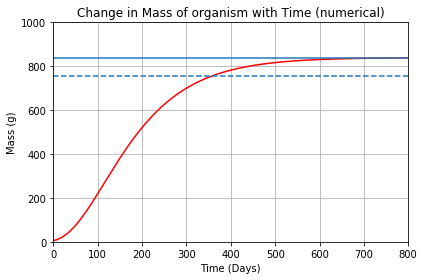

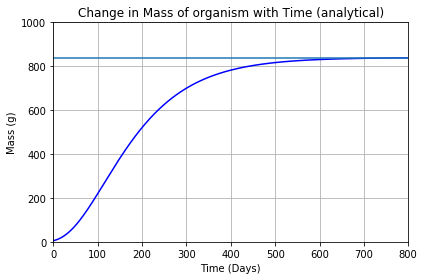

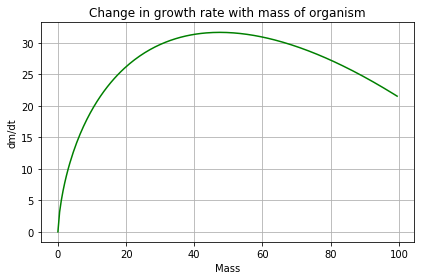

In [29]:
# Script of West et al growth model - rate of growth with mass
def growth_model(a, b, m):
    """Produces figure of growth rate dm/dt with mass"""
    dm_dt = a*(m**0.75) - b*m # general model equation
    growth_curve = plt.plot(m, dm_dt, 'g-', label = 'Growth rate')   # how does growth rate change with mass
    # ylim = ax.get_ylim()
    # plt.vlines(3, ylim[0], ylim[1])
    plt.xlabel('Mass')
    plt.ylabel('dm/dt')
    plt.title('Change in growth rate with mass of organism')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Rate of growth ODE
def dm_dt(m,t,a,b): 
    """ ODE model of growth - Takes model parameters and populates array
    based on model calculations"""                      # t=0 is default
    dmdt = a*(m**0.75) - b*m
    return sc.array(dmdt)

# Analytically derived mass with time
def growth_time(M, m0, a, t):
    """Produces figure of mass with time growth curve"""
    curve = M*((1 - (1 - ((m0/M)**0.25))*np.exp(-a*t/(4*(M**0.25))))**4) # general lifetime growth curve determinate
    growth_curve = plt.plot(t, curve, 'b-', label = 'Mass with Time')
    axes = plt.gca()
    axes.set_xlim([0,800])
    axes.set_ylim([0,1000])
    
    plt.xlabel('Time (Days)')
    plt.ylabel('Mass (g)')
    plt.title('Change in Mass of organism with Time (analytical)')
    plt.grid(True)
    plt.axhline(M) # asymptotic growth
    plt.tight_layout()
    plt.show()

# Define initial conditions for integration
m = 5
mass0 = sc.array(m)

# Populate arrays
mass = np.arange(0,100,0.5) # Mass array
time = np.arange(0,800,1) # Time array
a = 0.2  
b = a/(840**0.25)     # rearrange eq. 6 to find b in terms of a
c = 0.001
beta=1.08

# Integrate - numerically derived mass with time
int_mass = integrate.odeint(dm_dt, mass0, t=time, args=(a,b))

# Plot numerical solution
growth_curve = plt.plot(time, int_mass, 'r-', label = 'Mass with Time')
plt.xlabel('Time (Days)')
plt.ylabel('Mass (g)')
plt.title('Change in Mass of organism with Time (numerical)')
plt.grid(True)
axes = plt.gca()
axes.set_xlim([0,800])
axes.set_ylim([0,1000])
plt.axhline((a/b)**4) # asymptotic growth
plt.axhline((a/(b+c))**4, linestyle='--') # asymptotic growth
plt.tight_layout()
plt.show()

# Lifetime Growth curve for guinea pig (West et al. 2001, p2)
growth_time(M = 840, m0 = 5, a = 0.2, t = time)

growth_model(a = 7, b = 2, m = mass)


Charnov (2001) builds on West _et al._'s model by incorporating an explicit allocation-to-reproduction term (ATR) denoted by c, or "loss of potential growth to reproduction"

\begin{equation}
    \frac{dm}{dt} = am^{3/4} - bm - cm \\
    \frac{dm}{dt} = am^{3/4} - (b + c)m
\end{equation}

As a result of this new term, the asymptotic size of the organism should now translate downwards since:

\begin{equation}
    M = \Big(\frac{a}{b+c}\Big)^4
\end{equation}

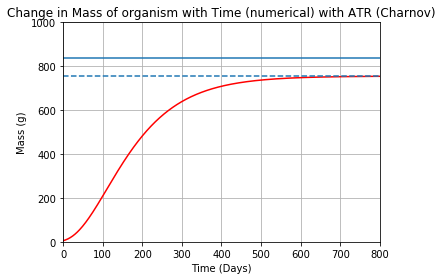

In [58]:
def dm_dt(m,t,a,b,c,beta):                                  # numerically counting the behaviour of this model by repeating this mdoel as many times so as to have accurate representation of what model is doing
    """ Charnov ODE model of growth with reproduction 
    Takes model parameters and populates array
    based on model calculations"""                      # t=0 is default
    dmdt = a*(m**0.75) - b*m - c*(m**beta)
    return sc.array(dmdt)

# Initial conditions
a = 0.2  
b = a/(840**0.25)     # rearrange eq. 6 to find b in terms of a
c = 0.001
beta=1 # scaling of reproductive allocation with mass

# Integrate - numerically derived mass with time
int_mass = integrate.odeint(dm_dt, mass0, t=time, args=(a,b,c,beta))

# Plot numerical solution
growth_curve = plt.plot(time, int_mass, 'r-', label = 'Mass with Time')
plt.xlabel('Time (Days)')
plt.ylabel('Mass (g)')
plt.title('Change in Mass of organism with Time (numerical) with ATR (Charnov)')
plt.grid(True)
axes = plt.gca()
axes.set_xlim([0,800])
axes.set_ylim([0,1000])
plt.axhline((a/b)**4) # asymptotic growth
plt.axhline((a/(b+c))**4, linestyle='--') # asymptotic growth
plt.tight_layout()
plt.show()


Increasing exponent on $c$ term also reduces asymptotic size - intuitive since
\begin{equation}
    M = \Big(\frac{a}{b+c}\Big)^4
\end{equation}

thus increasing the exponent on c increases the value of the denominator hence yielding a smaller terminal size

Marshall & White 2019 (SI) assumed:
* rates of energy intake and expenditure scale with metabolic rate as $m^{0.81}$
* rate of reproduction scales as $m^{1.28}$ where exponent is calculated as sum of exponents for:
    * egg volume
    * batch fecundity
    * no. batches per year
    * 1 - exponent for egg energy contnet
* thus rate of growth is calculated as:
\begin{equation}
    \frac{dm}{dt} = fam^{0.81} - (am^{0.81} - cm^{1.28})
\end{equation}
* Coefficients
    * a = scaling coefficient for energy expenditure
    * c = scaling coefficient for reproduction
    * f = factorial difference between intake and expenditure
    
Essentially they are capturing the maintenance term as the difference between growth and reproduction i.e. energy surplus. NB: chicken & egg problem, do they _really_ maintain AFTER ATR or the converse?

Integral has no closed-form solution so paramters $a$, $c$ and $f$ and starting value $m_{initial}$ fitted using "brute force" - $25$ values each and $25^4$ combinations, each iterated over $500$ timesteps to generate growth curve.

## Ideas from Samraat & Tom
In metabolic theory models, B assumes constant rate of flow of energy.
If we define B as a function of energy supply $f(supply)$ then we would see a Holling Type II response, since eventually, with enough resource, limited only by handling time.

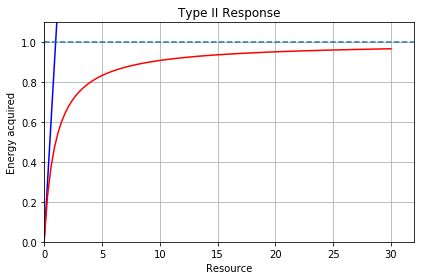

In [54]:
x = np.linspace(0,30,num=100)
typei = x
typeii = x/(1+x)
growth_curvei = plt.plot(x, typei, 'b-', label = 'Type II Response')
growth_curveii = plt.plot(x, typeii, 'r-', label = 'Type II Response')
plt.xlabel('Resource')
plt.ylabel('Energy acquired')
plt.title('Type II Response')
plt.grid(True)
plt.axhline(1, linestyle='--') # asymptotic growth
axes = plt.gca()
axes.set_xlim([0,32])
axes.set_ylim([0,1.1])
plt.tight_layout()
plt.show()

We might see the West _et al._ 2001 growth curve when the conditions are ideal e.g lab, but what about real life?

\begin{equation}
B = C = a \cdot m_R \cdot x_R \cdot f(\cdot) \\
f(\cdot) = \frac{1}{1+a_h \cdot x_R}
\end{equation}

where:
$a$ = search rate <br/>
$m_R$ = mass of resource <br/>
$x_R$ = abundance of resource, which varies with time. Thus inflow of energy varies with time: <br/>

\begin{equation}
C \rightarrow C(t) = a \cdot m_R \cdot x_R(t) \cdot f(\cdot)
\end{equation}

second term in denominator is dimensionless since the units are:
\begin{equation}
a_h \cdot x_R = Individual \cdot \frac{Area}{Time} \cdot Time \cdot \frac{Individual}{Area}
\end{equation}

## Reconciling functional response and growth rate
Metabolic rates or Resting MR uses idealised condtions i.e. no foraging, no locomotion. In the West _et al._ (2001) model, ideal conditions would have been used. Or alternatively the animals growth rates were measured in lab conditions - were they cherry-picked for their growth curve? Under these conditions, animals would have been in a **resource saturated** environment and thus only limited by handling time, which was found by Pawar _et al._ to scale with the standard $m^{3/4}$.
Perhaps the scattering of the points around the line (deviations) are caused by a non-saturated environment. Not necessarily depleted completely, but enough to substantiate foraging efforts which scale super-linearly with size.

In which case this would substitute the $a$ term in our growth equation (NB: new $a$ is search rate).

\begin{equation}
    \frac{dm}{dt} = \Big(a \cdot m_R \cdot x_R \cdot f(\cdot)\Big)m^{3/4} - bm - cm^\beta
\end{equation}

In this case we could see if the state of the resource environment impacts the scaling of reproductive allocation with mass **and** hopefully answer the question of "do they allocate to reproduction first then maintenance or the other way round?".

Would do this by fixing the new $a$ term as a depleted environment, then vary the mass and see if $\beta$ increases.

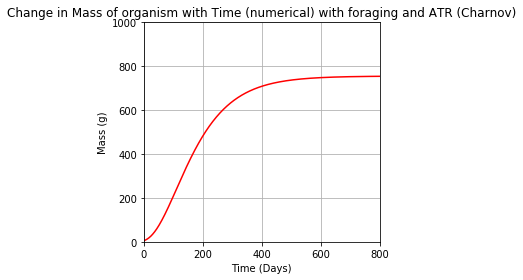

In [63]:
def dm_dt_foraging(m, t, search, mR, xR, b, c, beta):                                  # numerically counting the behaviour of this model by repeating this mdoel as many times so as to have accurate representation of what model is doing
    """ Charnov ODE model of growth with reproduction 
    Takes model parameters and populates array
    based on model calculations"""                      # t=0 is default
    dmdt = search*mR*xR*(m**0.75) - b*m - c*(m**beta)
    return sc.array(dmdt)

# Initial conditions
search = 0.2
mR = 1
xR = 1
b = a/(840**0.25)     # rearrange eq. 6 to find b in terms of a
c = 0.001
beta=1 # scaling of reproductive allocation with mass

# Integrate - numerically derived mass with time
int_mass_foraging = integrate.odeint(dm_dt_foraging, mass0, t=time, args=(search,mR,xR,b,c,beta))

# Plot numerical solution
growth_curve = plt.plot(time, int_mass_foraging, 'r-', label = 'Mass with Time')
plt.xlabel('Time (Days)')
plt.ylabel('Mass (g)')
plt.title('Change in Mass of organism with Time (numerical) with foraging and ATR (Charnov)')
plt.grid(True)
axes = plt.gca()
axes.set_xlim([0,800])
axes.set_ylim([0,1000])
# plt.axhline((a/b)**4) # asymptotic growth
plt.axhline((b+c))**4, linestyle='--') # asymptotic growth
plt.tight_layout()
plt.show()

### The Kozłowski Model

Their model starts from the assumption that surplus energy (not used for maintenance) should be optimally allocated to growth and reproduction in order to maximize fitness. Versus Marshall who implies maintenance occurs after devotion to reproduction. But as Tom said, maintenance of existing cells is non-negotiable.

"Let us assume that individuals of the species under consideration can live no longer than two years, and can reproduce either in the second year only or in both years. Let reproduction be continuous, i.e. energy allocated to reproduction be released immediately. Let us also assume that mortality rate is size-independent after reaching some threshold body size, but can differ between the growing season and winter. Reproductive rate can be measured either as the amount of energy allocated to reproduction or the number of offspring of the same size and quality. Under such assumptions, the average lifetime amount of energy allocated to reproduction (or offspring production) can be represented by the sum of volumes of two solids depicted in Fig. la. The axes of the three-dimensional space in which the solids are placed are as follows: age (x), probability of surviving to a given age (l(x)) and the rate of reproduction m(x). The space between two solids represents the unproductive part of the year, when neither growth nor reproduction is possible ('winter'), and also the part of the second growing season devoted to growth.
Because of the assumption that the switch from growth to reproduction is always complete, the
growth curve has the form shown in Fig. lb: body size increases until an individual matures at age tl, then remains constant until the beginning of the second growing season, then growth is continued until the switch to reproduction at age t2. Thus function m(x) has the following form: (1) it equals zero for immature individuals; (2) from the onset of maturation occurring at age tl and corresponding size wl to the end of the first growing season, reproductive rate is equal to H(Wl); (3) then again re(x) = 0 throughout winter and in the part of the second growing season preceding the switch to reproduction occurring at age t2 and corresponding size w2; (4) from t2 to the end of the second growing season reproductive rate equals H(w:). Such"

![title](../Other/kozlowski_figure.png)

Graphical representation of fitness measured as the lifetime energy allocation to reproduction
(or the number of offspring produced) for a species living at most for two years and reproducing in both years. (a) The axes of the three-dimensional space are age ($x$), probability of surviving to a given age ($l(x)$)
(or the number of offspring produced) for a species living at most for two years and reproducing in both years. (a) The axes of the three-dimensional space are age ($x$), probability of surviving to a given age ($l(x)$) and the rate of energy allocation to reproduction (or the rate of offspring production) $m(x)$. The measure of
years. (a) The axes of the three-dimensional space are age ($x$), probability of surviving to a given age ($l(x)$) and the rate of energy allocation to reproduction (or the rate of offspring production) $m(x)$. The measure of fitness is equivalent to the volume of the two solids, representing reproductive success in the first and in the
and the rate of energy allocation to reproduction (or the rate of offspring production) $m(x)$. The measure of fitness is equivalent to the volume of the two solids, representing reproductive success in the first and in the
second growing season, respectively. (b) The dynamics of body size; $t_1$ and $t_2$ represent the times of
switching from growth to reproduction in the first and in the second year, respectively.